# 3. Clustering



## K-means

k-means is one of the most popular clustering algorithms, which is widely used in academia as well as in industry.

The k-means algorithm belongs to the category of prototype-based clustering.

Prototype-based clustering means that each cluster is represented by a prototype, which can either be the centroid (average) of similar points with continuous features, or the medoid (the most representative or most frequently occurring point) in the case of categorical features.

In [1]:
import pandas as pd
df=pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
df.shape

(20640, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
X= df.iloc[:, [0,1]].values
X

array([[-122.23,   37.88],
       [-122.22,   37.86],
       [-122.24,   37.85],
       ...,
       [-121.22,   39.43],
       [-121.32,   39.43],
       [-121.24,   39.37]])

In [6]:
from sklearn.cluster import KMeans
kmeansmodel = KMeans(n_clusters= 6, init='random',max_iter=300,tol=1e-04, random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

#For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"

In [9]:
distortions=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
    
    #inertia_ is the formula used to segregate the data points into clusters

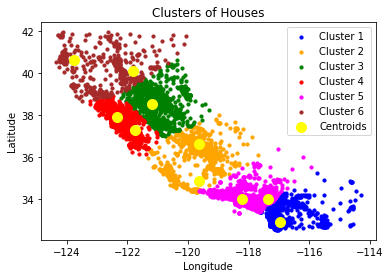

Distortion:4839.32


In [12]:
import matplotlib.pyplot as plt
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'orange', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'red', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 10, c = 'brown', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Houses')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(scatterpoints=1)
plt.show()
print('Distortion:%.2f'%kmeans.inertia_)

Using the elbow method and K-Means++ to fnd the optimal number of clusters.

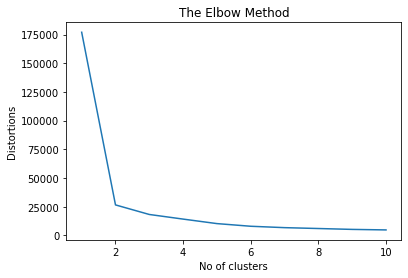

In [11]:

plt.plot(range(1,11), distortions)
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('Distortions')
plt.show()

k-means++ is a popular variant of the classic k-means algorithm.

Classic k-means algorithm that uses a random seed to place the initial centroids, which can sometimes result in bad clusterings or slow convergence if the initial centroids are chosen poorly.

(i) One way to address this issue is to run the k-means algorithm multiple times on a dataset and choose the best performing model in terms of the SSE.

(ii) Another strategy is to place the initial centroids far away from each other via the k-means++ algorithm, which leads to better and more consistent results than the classic k-means.


In [48]:
kmeansmodel = KMeans(n_clusters= 2, init='k-means++',max_iter=300,tol=1e-04, random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

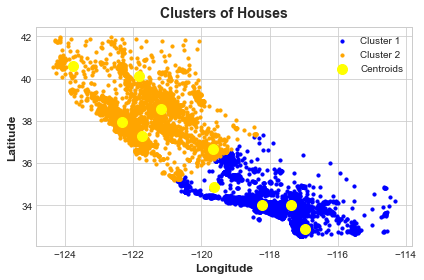

In [50]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'orange', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Houses')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(scatterpoints=1)
plt.show()